In [3]:
import numpy as np
import re
import pandas as pd
from tqdm.notebook import tqdm
from datasets import load_dataset
import umap
import altair as alt
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer
from typing import List
import enum

from langchain_community.llms import Ollama
from langchain.output_parsers.regex_dict import RegexDictParser
from langchain.output_parsers import PydanticOutputParser
from langchain_core.messages import HumanMessage, SystemMessage, ChatMessage
from langchain.prompts import ChatPromptTemplate, PromptTemplate
from pydantic import BaseModel, Field, validator, create_model
from openai import AsyncOpenAI, OpenAI
import asyncio
import os

import requests
import json

import itertools
from copy import deepcopy
from tqdm.notebook import tqdm, trange
from sklearn.cluster import KMeans

import umap.umap_ as umap
#import umap
import hdbscan

from typing import Literal, Union
from pydantic.config import ConfigDict

from src.utilities import *

import instructor
from llama_cpp import Llama



In [6]:
client = OpenAI(base_url="http://localhost:8000/v1", api_key="sk-xxx")
client = instructor.patch(client)

In [15]:
csv_path = 'archives/www.darty.com.csv'
feedbacks_df = pd.read_csv(csv_path, sep=';')
feedbacks_df.head()

,Title,Date,Content,Page,Username,Total reviews,Location,Rating
0,"Fuyez, une arnaque","February 05, 2024",2000€ d’appareils et ils ne fonctionnent pas p...,1,Violaine Becha,1 review,FR,1.0
1,Centrale vapeur calor défaillante au bout de 5...,"February 03, 2024",Le lundi 29 janvier 2024 je récupère une centr...,1,Isabelle bas-rhin,9 reviews,FR,1.0
2,Évitez !! Les actions du vendeur sont absolume...,"March 30, 2023",Évitez d'acheter auprès de ce vendeur en ligne...,1,Mikhail Shangin,3 reviews,FR,1.0
3,Le SAV est une catastrophe!,"January 15, 2024",Le SAV est une catastrophe!Le client ne l'est ...,1,SCD,1 review,FR,1.0
4,Machine a laver Bosch,"January 05, 2024",Commandée sur le site de Darty machine a laver...,1,Christiane,56 reviews,FR,5.0


In [20]:
import pandas as pd

# Create a sample DataFrame
df = pd.DataFrame({'Date': ['February 05, 2024', 'February 06, 2024']})

# Specify the format of the date strings
date_format = '%B %d, %Y'

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format=date_format)

# Print the DataFrame
print(df)


        Date
0 2024-02-05
1 2024-02-06


In [23]:
feedbacks_df['Date'] = pd.to_datetime(feedbacks_df['Date'], format='%B %d, %Y', errors='coerce')

In [44]:
mean_rating

Date
2010.0    1.000000
2011.0    3.400000
2012.0    4.156250
2013.0    4.000000
2014.0    1.739130
2015.0    1.448000
2016.0    1.411392
2017.0    1.340599
2018.0    1.347744
2019.0    1.283245
2020.0    1.305479
2021.0    1.327765
2022.0    2.492063
2023.0    3.492371
2024.0    3.263959
Name: Rating, dtype: float64

In [85]:
#grouped_data = feedbacks_df.groupby([feedbacks_df['Date'].dt.year, feedbacks_df['Date'].dt.month]).agg({'count'}).Title
grouped_data = feedbacks_df.groupby(feedbacks_df['Date'].dt.year)
mean_rating = feedbacks_df.groupby(feedbacks_df['Date'].dt.year).Rating.mean()
group_count = grouped_data.Title.count()

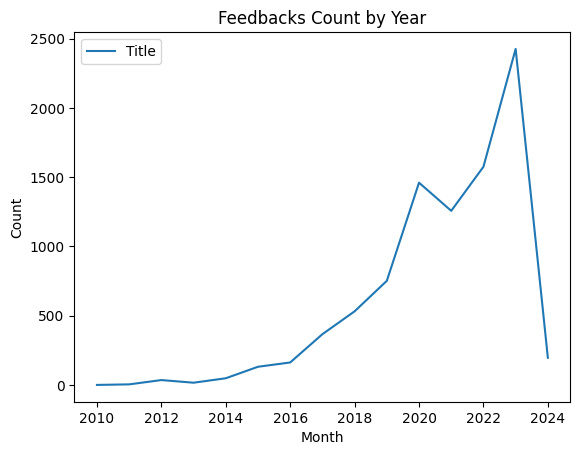

In [87]:
import matplotlib.pyplot as plt

# Assuming the grouped data is stored in a variable called 'grouped_data'
#grouped_data.unstack().plot(kind='line')
group_count.plot(kind='line')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Feedbacks Count by Year')
plt.legend()
plt.show()


In [91]:
list(mean_rating.index)

[2010.0,
 2011.0,
 2012.0,
 2013.0,
 2014.0,
 2015.0,
 2016.0,
 2017.0,
 2018.0,
 2019.0,
 2020.0,
 2021.0,
 2022.0,
 2023.0,
 2024.0]

In [100]:
x = np.array(mean_rating.index)
y = group_count
c = mean_rating

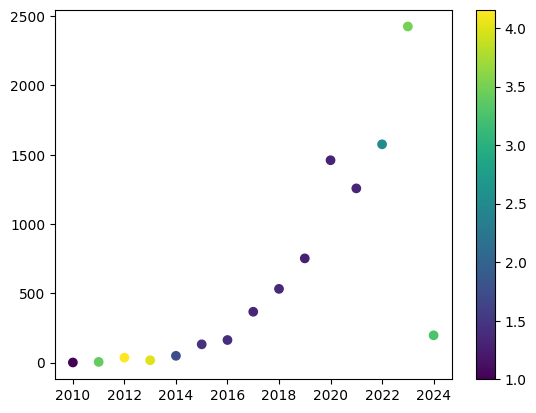

In [101]:
import matplotlib.pyplot as plt

# Assuming your arrays are named x, y, and c
plt.scatter(x, y, c=c)
plt.colorbar()  # Add a colorbar to show the color-value relationship
plt.show()


In [103]:
pip install plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 54.6 kB/s eta 0:00:0000:01m00:04
Note: you may need to restart the kernel to use updated packages.


In [104]:
import plotly.express as px

# Assuming your arrays are named x, y, and c
fig = px.scatter(x=x, y=y, color=c)
fig.show()


In [115]:
from scipy.interpolate import interp1d

x_new = np.linspace(x.min(), x.max(),500)

y_smooth = interp1d(x, y, kind='quadratic')(x_new)
c_smooth = interp1d(x, c, kind='quadratic')(x_new)


fig = px.scatter(x=x_new, y=y_smooth, color=c_smooth)
fig.show()



In [116]:
fig = px.plot(x=x_new, y=y_smooth, color=c_smooth)
fig.show()

AttributeError: module 'plotly.express' has no attribute 'plot'

In [ ]:

plt.plot (x_new,y_smooth)
plt.scatter (x, y)
